In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('/Users/aadityajoshi/Downloads/llm-classification-finetuning/test.csv')

In [3]:
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [4]:
#very simple approeach, combine all text and responses
X_train = train_df[['prompt','response_a','response_b']]
y_train = train_df[['winner_model_a','winner_model_b','winner_tie']]
X_test = test_df[['prompt','response_a','response_b']]

In [5]:
def create_text(df):
    text = ""
    text += "<prompt>" + df["prompt"] + "<r_a>" + df['response_a'] + "<r_b>" + df['response_b']
    return text

In [6]:
X_train = X_train.apply(create_text,axis=1)

In [7]:
test_df

,id,prompt,response_a,response_b
0,136060,"[""I have three oranges today, I ate an orange ...","[""You have two oranges today.""]","[""You still have three oranges. Eating an oran..."
1,211333,"[""You are a mediator in a heated political deb...","[""Thank you for sharing the details of the sit...","[""Mr Reddy and Ms Blue both have valid points ..."
2,1233961,"[""How to initialize the classification head wh...","[""When you want to initialize the classificati...","[""To initialize the classification head when p..."


In [8]:
def create_label(df):
    if df['winner_tie'] == 1:
        return 0
    elif df['winner_model_a'] == 1:
        return 1
    else :
        return 2

In [9]:
y_train = y_train.apply(create_label,axis=1)

In [10]:
X_train

0        <prompt>["Is it morally right to try to have a...
1        <prompt>["What is the difference between marri...
2        <prompt>["explain function calling. how would ...
3        <prompt>["How can I create a test set for a ve...
4        <prompt>["What is the best way to travel from ...
                               ...                        
57472    <prompt>["A simple mnemonic for \u03c0:\n\"How...
57473    <prompt>["In python, implement a naive Bayes w...
57474    <prompt>["is it unethical to work on building ...
57475    <prompt>["If a bait contains 0,0025% bromadiol...
57476    <prompt>["three kids eat three apples in three...
Length: 57477, dtype: object

In [11]:
y_train

0        1
1        2
2        0
3        1
4        2
        ..
57472    1
57473    1
57474    1
57475    2
57476    1
Length: 57477, dtype: int64

<Axes: >

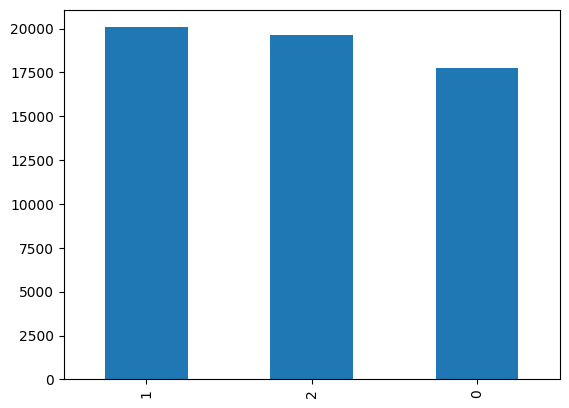

In [12]:
y_train.value_counts().plot(kind='bar')

In [13]:
len_X = X_train.apply(len)

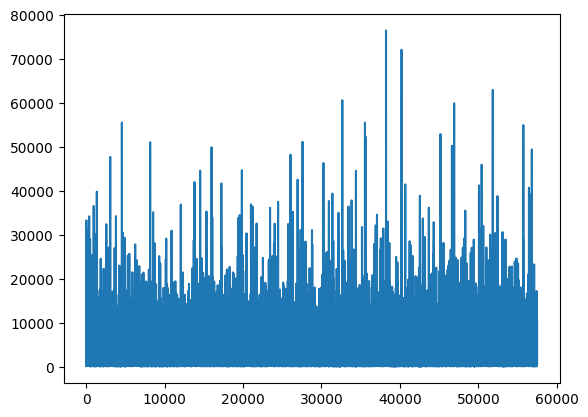

In [14]:
plt.plot(len_X)

In [15]:
train_df_upd = pd.DataFrame(X_train,columns=['text'])

In [16]:
train_df_upd['label'] = y_train

In [18]:
train_df_upd.to_csv('new_train.csv')

In [19]:
test_df_upd = pd.DataFrame(X_test,columns=['text'])

### fine tuning

In [24]:
df = pd.read_csv('new_train.csv',index_col=0)

In [25]:
df

,text,label
0,"<prompt>[""Is it morally right to try to have a...",1
1,"<prompt>[""What is the difference between marri...",2
2,"<prompt>[""explain function calling. how would ...",0
3,"<prompt>[""How can I create a test set for a ve...",1
4,"<prompt>[""What is the best way to travel from ...",2
...,...,...
57472,"<prompt>[""A simple mnemonic for \u03c0:\n\""How...",1
57473,"<prompt>[""In python, implement a naive Bayes w...",1
57474,"<prompt>[""is it unethical to work on building ...",1
57475,"<prompt>[""If a bait contains 0,0025% bromadiol...",2
